3.141592653589793


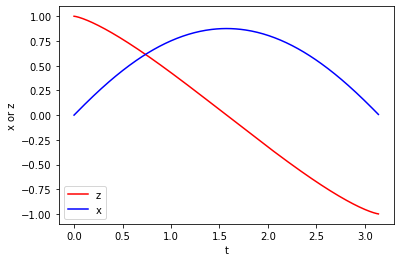

3.141592653589793


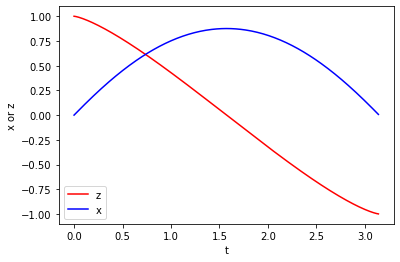

3.141592653589793


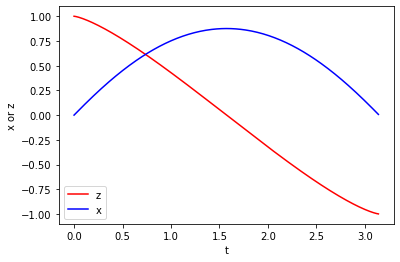

3.141592653589793


/Users/andyketchum/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


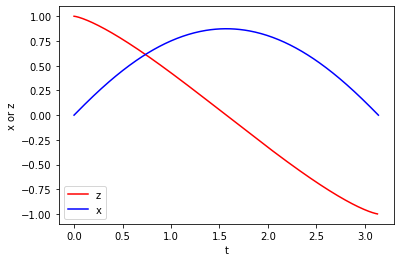

3.141592653589793


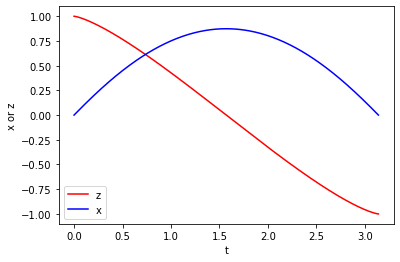

3.141592653589793


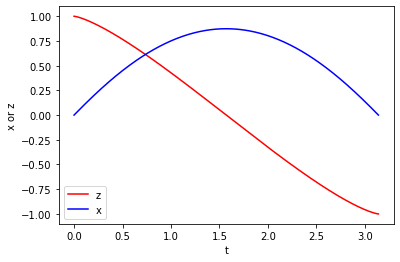

[7.98360076e-01 2.00000000e+00 4.83827155e-06]
3.141592653589793


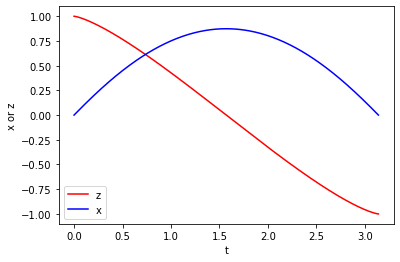

x(pi) using Eguess from Newton method is 1.4271432968115949e-05 which is almost 0 satisfying BC at x(pi)
Eguess_final is 0.7983600758668815


In [6]:
def shooting_eigen(Eguess): #function takes Eguess
    E=Eguess
    
    import numpy as np
    import matplotlib as mp
    import matplotlib.pyplot as plt


    #I have Garcia's rk4 module in the same working directory
    from rk4 import rk4						#this imports rk4

    def derivatives_shooting(x,t,params): #two input arguments x and t, x=[z1,x1]; fucntion defines derivatives 
      

        z1,x1=x
        x= np.asarray(x)

      

        #derivatives writtewn as two coupled odes
        dz1dt=-E*x1**(1/3)

        dx1dt=z1

        dxdt=[dz1dt, dx1dt]
        dxdt=np.asarray(dxdt)
        return dxdt
        return np.reshape(dxdt,2) #function returns the derivatives



    x=np.array([np.array([1.]), np.array([0])]) #intial values

    x=np.reshape(x,2)


    t=0. 
    T=np.pi #T is the final time
    print(T)


    dt=0.01 #time step
    niter=T/dt 
  

     #where we will store the data at each timestep for rk4
    sampleTimes=np.asarray(range(int(niter)+1))*dt #sampleTimes=sample_zvalues
    rk4Result1=[1.]		#where we will store the data for plotting; rk4Result1 corresponds to z1
    rk4Result2=[0.] #rk4Result2 corresponds to x1


    #integrating

    for titer in range(int(niter)):
        x=rk4(x,t,dt,derivatives_shooting,[])

        rk4Result1=np.append(rk4Result1,[x[0]])#store the value of x
        rk4Result2=np.append(rk4Result2,[x[1]])
        t=t+dt
    x_pi_Eguess=rk4Result2[-1] #corresponds to x value at pi
    
    #plotting commands; just to get a visual idea of the solution
    fig,(a1)=plt.subplots(1)


    a1.plot(sampleTimes,rk4Result1,color='r',label='z')
    a1.plot(sampleTimes,rk4Result2,color='b',label='x')


    ax1=a1.axes

    a1.legend(loc='lower left')
    a1.set_xlabel('t')
    a1.set_ylabel('x or z')

    #plt.savefig('Pb3.png')
    plt.show()	
    

    return x_pi_Eguess #function returns x value at pi


#Newton's method implementation


def shooting_Newton(Eguess, dE, tol, maxiter): #input paramemters are Eguess and dE step, tolerance and max iterations
    import numpy as np
    iter_count=1 #to keep count of the number of iterations
    for element in np.arange(maxiter):
            der=(shooting_eigen(Eguess+dE)-shooting_eigen(Eguess))/dE #shooting_eigen(Eguess) is g(E)=x(pi) of question #
            #derivative  of g(E) is der
            delta=-shooting_eigen(Eguess)/der #delta is the change for each step min netwon's method
            
            if abs(delta)<=tol: #if tolerance reached, stop loop
                break
            if iter_count==maxiter: #if maxiter reached stop loop
                break
            Eguess=Eguess+delta #updating Eguess  
            iter_count=iter_count+1
    return np.array([Eguess, iter_count, delta]) #returns Eguess for whcich g(E)-x(pi)=0; note x(pi)=0 
Eguess=.01 #given in question; this guess makes the algorithm diverge; so by experimentation, a guess of .796 is used
Output=shooting_Newton(.796,.0001,.00001, 5)
print(Output)
Eguess_final=Output[0] #extracting Eguess from newton's method output

#Checking if the above Eguess_final indeed gives x(pi) close to 0
print('x(pi) using Eguess from Newton method is '+str(shooting_eigen(Eguess_final))+' which is almost 0 satisfying BC at x(pi)')

#printing Eguess_final
print('Eguess_final is '+ str((Output[0])))